In [2]:
import autograd.numpy as np
from autograd import grad, hessian

In [47]:
# generate 50 points in -2pi, 2pi and corresponding f(x) values
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
# define polynomial basis function
def phi(x, n):
    return np.array([x**i for i in range(n+1)])

# define the least squares cost function
def cost(w):
    cost = 0
    for i in range(len(x)):
        cost += (np.dot(w, phi(x[i], len(w)-1)) - y[i])**2
    return cost

# define the gradient of the cost function
d_cost = grad(cost)

# define the hessian of the cost function
h_cost = hessian(cost)

# initialize small random weights in [-0.1, 0.1]
w = np.random.uniform(-0.1, 0.1, 6)

# backtracking procedure
def backtracking(w, alpha, beta):
    grad = d_cost(w)
    norm_grad = np.linalg.norm(grad)
    t = 0.9
    while cost(w - t*grad) > cost(w) - alpha*t*norm_grad**2:
        t *= beta
    return t

# gradient descent
alpha = 0.75
beta = 0.9
for i in range(200):
    if np.linalg.norm(d_cost(w)) < 1e-6:
        break
    t = backtracking(w, alpha, beta)
    w = w - t*d_cost(w)
    print(cost(w))

# print the results
print(w)
print(i)

59.39116059470807
42.788650685947616
37.083412555573666
32.439627313775205
28.690448633381212
27.115400623011748
25.448314219487173
24.953999627744
24.280828136960572
24.141396846757942
23.885723161625716
23.835563882090366
23.771293541624274
23.744022855982607
23.571765392701906
23.545689423997832
23.514974087641114
23.489158990895227
23.451914300978995
23.4311072898932
23.11813220951459
23.04681842606767
23.019545323329893
22.997743971742704
22.936463833939175
22.915544573109326
22.866608952540844
22.8470299235751
22.72970970569195
22.699640229566487
22.68212973009277
21.952120828725377
21.798461121266122
21.75138633130303
21.73317790977808
21.691647098363717
21.675840890337927
21.626045488751497
21.60800303190783
21.570266695961923
21.554222969466906
21.03903791877774
20.934718030454505
20.90187052093217
20.886907236804344
20.798596046844818
20.775456128147574
20.762103028099325
20.212240536677484
20.093513117088065
20.05720692708038
20.043253550356575
20.014060048449576
20.00165785

In [48]:
w.shape

(6,)

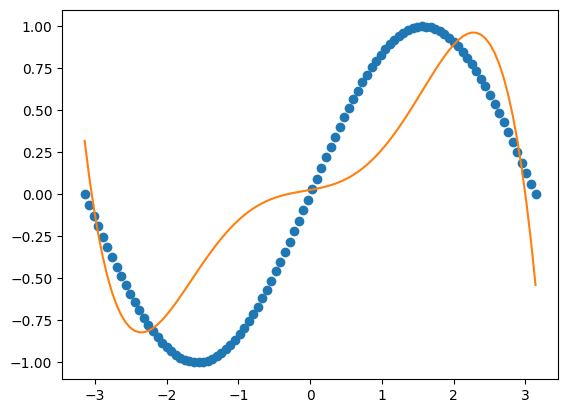

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the results
plt.plot(x, y, 'o')
x_plot = np.linspace(-np.pi, np.pi, 100)
y_plot = np.array([np.dot(w, phi(x_plot[i], len(w)-1)) for i in range(len(x_plot))])
plt.plot(x_plot, y_plot)
plt.show()